In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

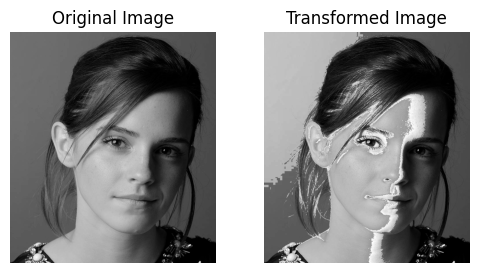

In [65]:
# Load the grayscale image (Fig. 1b)
img = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

# Define the intensity transformation function
def intensity_transformation(input_intensity):
    if input_intensity < 100:
        return input_intensity  # Linear with slope 1
    # 2.5 * input_intensity  # Linear with slope 2.5
    elif input_intensity <= 150:
        return input_intensity*1.55 + 22.5
    else:
        return input_intensity  # Linear with slope 1

# Apply the intensity transformation to the image
transformed_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        transformed_img[i, j] = intensity_transformation(img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


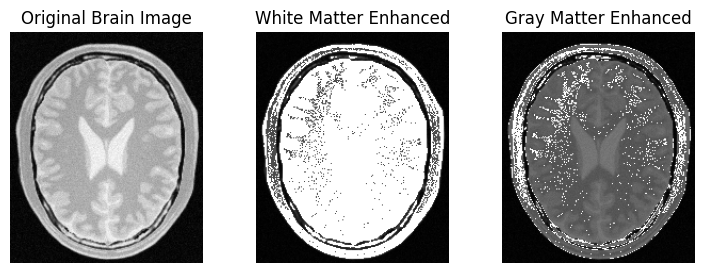

In [66]:
# Load the brain proton density image (Fig. 2)
brain_img = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

# Define intensity transformation for white and gray matter
# You may need to tune the values for white and gray matter intensity ranges based on the image

def transform_for_white_matter(input_intensity):
    if input_intensity >= 160:  # White matter is typically in higher intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

def transform_for_gray_matter(input_intensity):
    if 100 <= input_intensity < 160:  # Gray matter intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

# Apply transformations for both white and gray matter
white_matter_img = np.zeros_like(brain_img)
gray_matter_img = np.zeros_like(brain_img)

for i in range(brain_img.shape[0]):
    for j in range(brain_img.shape[1]):
        white_matter_img[i, j] = transform_for_white_matter(brain_img[i, j])
        gray_matter_img[i, j] = transform_for_gray_matter(brain_img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(brain_img, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_matter_img, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_img, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.show()


#### 3.1

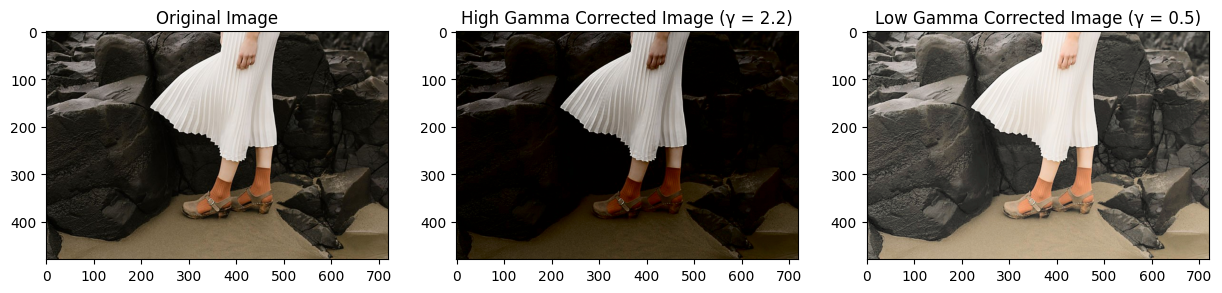

In [67]:
# Load the image for gamma correction (Figure 3)
img = cv2.imread('a1images/highlights_and_shadows.jpg')

# Convert the image to L*a*b* color space
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split L*, a*, and b* channels
L, a, b = cv2.split(lab_img)

# Apply gamma correction to the L channel (assume γ=2.2 for this example)
gamma_H = 2.2
gamma_L = 0.5
L_normalized = L / 255.0
L_gamma_H_corrected = np.power(L_normalized, gamma_H)
L_gamma_H_corrected = (L_gamma_H_corrected * 255).astype(np.uint8)

# Merge back the channels and convert to BGR
lab_img_corrected_H = cv2.merge([L_gamma_H_corrected, a, b])
gamma_H_corrected_img = cv2.cvtColor(lab_img_corrected_H, cv2.COLOR_LAB2BGR)

L_gamma_L_corrected = np.power(L_normalized, gamma_L)
L_gamma_L_corrected = (L_gamma_L_corrected * 255).astype(np.uint8)

# Merge back the channels and convert to BGR
lab_img_corrected_L = cv2.merge([L_gamma_L_corrected, a, b])
gamma_L_corrected_img = cv2.cvtColor(lab_img_corrected_L, cv2.COLOR_LAB2BGR)

# Display original and gamma-corrected images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(gamma_H_corrected_img, cv2.COLOR_BGR2RGB))
plt.title(f'High Gamma Corrected Image (γ = {gamma_H})')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(gamma_L_corrected_img, cv2.COLOR_BGR2RGB))
plt.title(f'Low Gamma Corrected Image (γ = {gamma_L})')

plt.show()


#### 3.2

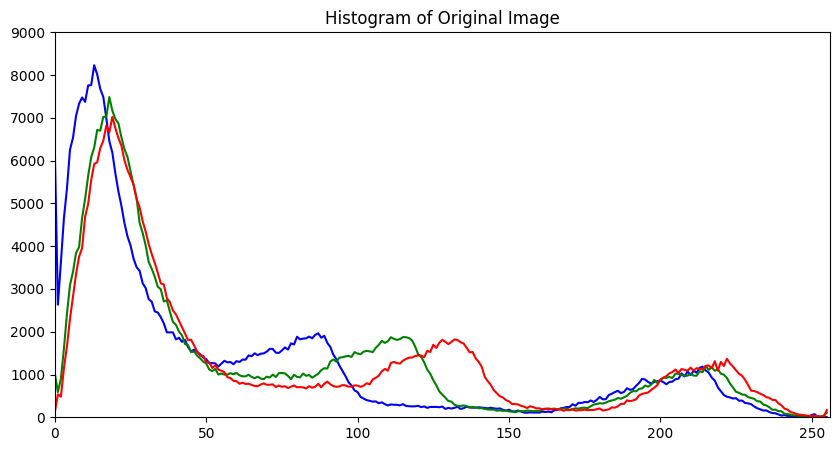

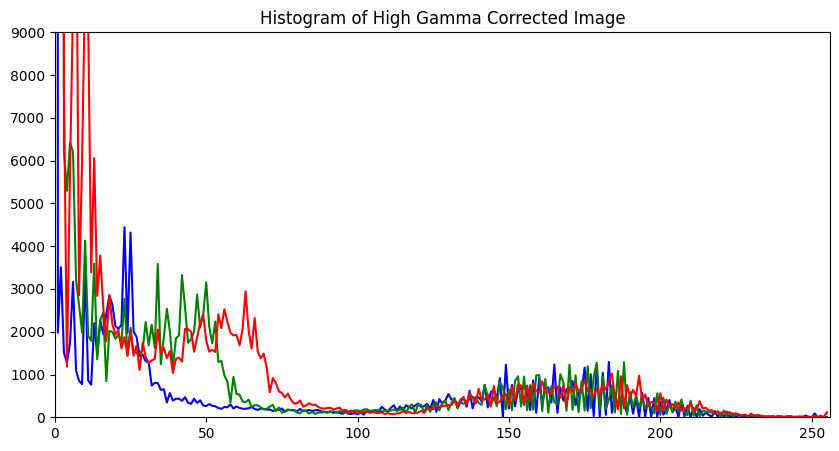

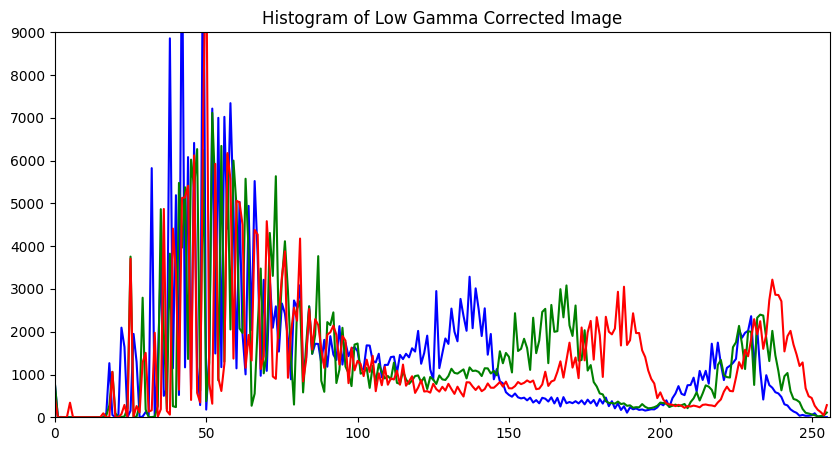

In [68]:
# Function to plot histograms
def plot_histograms(image, title):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(10, 5))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(title)
    plt.xlim([0, 256])
    plt.ylim([0, 9000])

# Plot histograms of the original and gamma corrected images
plot_histograms(img, "Histogram of Original Image")
plot_histograms(gamma_H_corrected_img, "Histogram of High Gamma Corrected Image")
plot_histograms(gamma_L_corrected_img, "Histogram of Low Gamma Corrected Image")

plt.show()


#### 4.1

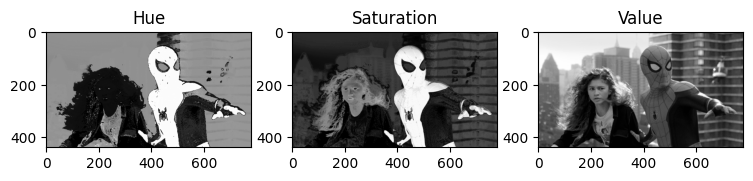

In [69]:
# Load the image (Figure 4)
img_vibrance = cv2.imread('a1images/spider.png')

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2HSV)

# Split the channels
h, s, v = cv2.split(hsv_img)

# Display each channel (Hue, Saturation, Value)
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')

plt.show()

In [70]:
def vibrance_intensity_transformation(x, a, sigma=70):
    return np.minimum(x + a * 128 * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

# Set a value for a
a = 0.5

# Apply the intensity transformation to the saturation channel
s_transformed = vibrance_intensity_transformation(s.astype(np.float64), a)



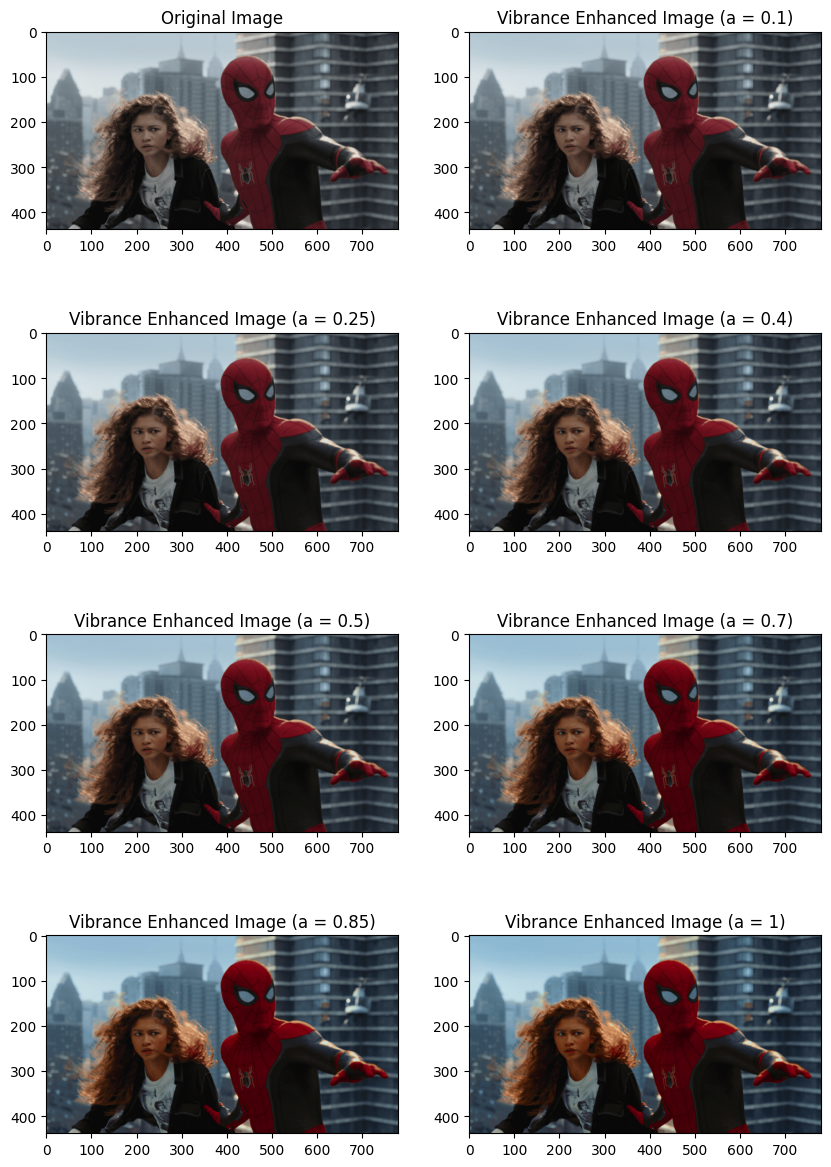

In [71]:
# Display original and vibrance-enhanced images
plt.figure(figsize=(10, 15))
plt.subplot(4, 2, 1)
plt.imshow(cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Apply the intensity transformation to the saturation channel for a = 0.1
s_transformed1 = vibrance_intensity_transformation(s.astype(np.float64), 0.1)

# Convert back to uint8
s_transformed1 = np.clip(s_transformed1, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed1 = cv2.merge([h, s_transformed1, v])
# Convert back to BGR color space
vibrance_enhanced_img1 = cv2.cvtColor(hsv_img_transformed1, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 2)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img1, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.1)')



# Apply the intensity transformation to the saturation channel for a = 0.25
s_transformed2 = vibrance_intensity_transformation(s.astype(np.float64), 0.25)

# Convert back to uint8
s_transformed2 = np.clip(s_transformed2, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed2 = cv2.merge([h, s_transformed2, v])
# Convert back to BGR color space
vibrance_enhanced_img2 = cv2.cvtColor(hsv_img_transformed2, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 3)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img2, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.25)')


# Apply the intensity transformation to the saturation channel for a = 0.4
s_transformed3 = vibrance_intensity_transformation(s.astype(np.float64), 0.4)

# Convert back to uint8
s_transformed3 = np.clip(s_transformed3, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed3 = cv2.merge([h, s_transformed3, v])
# Convert back to BGR color space
vibrance_enhanced_img3 = cv2.cvtColor(hsv_img_transformed3, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 4)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img3, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.4)')


# Apply the intensity transformation to the saturation channel for a = 0.5
s_transformed4 = vibrance_intensity_transformation(s.astype(np.float64), 0.5)

# Convert back to uint8
s_transformed4 = np.clip(s_transformed4, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed4 = cv2.merge([h, s_transformed4, v])
# Convert back to BGR color space
vibrance_enhanced_img4 = cv2.cvtColor(hsv_img_transformed4, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 5)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img4, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.5)')


# Apply the intensity transformation to the saturation channel for a = 0.7
s_transformed5 = vibrance_intensity_transformation(s.astype(np.float64), 0.7)

# Convert back to uint8
s_transformed5 = np.clip(s_transformed5, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed5 = cv2.merge([h, s_transformed5, v])
# Convert back to BGR color space
vibrance_enhanced_img5 = cv2.cvtColor(hsv_img_transformed5, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 6)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img5, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.7)')


# Apply the intensity transformation to the saturation channel for a = 0.85
s_transformed6 = vibrance_intensity_transformation(s.astype(np.float64), 0.85)

# Convert back to uint8
s_transformed6 = np.clip(s_transformed6, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed6 = cv2.merge([h, s_transformed6, v])
# Convert back to BGR color space
vibrance_enhanced_img6 = cv2.cvtColor(hsv_img_transformed6, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 7)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img6, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.85)')


# Apply the intensity transformation to the saturation channel for a = 1
s_transformed7 = vibrance_intensity_transformation(s.astype(np.float64), 1)

# Convert back to uint8
s_transformed7 = np.clip(s_transformed7, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed7 = cv2.merge([h, s_transformed7, v])
# Convert back to BGR color space
vibrance_enhanced_img7 = cv2.cvtColor(hsv_img_transformed7, cv2.COLOR_HSV2BGR)

plt.subplot(4, 2, 8)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img7, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 1)')




plt.show()

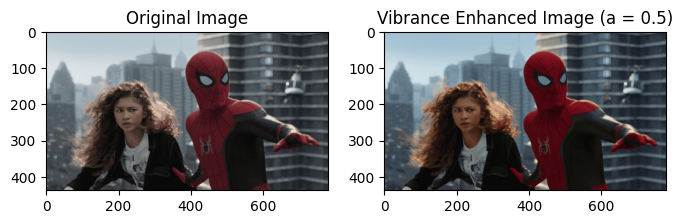

In [72]:

# Convert back to uint8
s_transformed = np.clip(s_transformed, 0, 255).astype(np.uint8)

# Recombine the HSV channels
hsv_img_transformed = cv2.merge([h, s_transformed, v])

# Convert back to BGR color space
vibrance_enhanced_img = cv2.cvtColor(hsv_img_transformed, cv2.COLOR_HSV2BGR)

# Display original and vibrance-enhanced images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = {a})')

plt.show()

#### 5

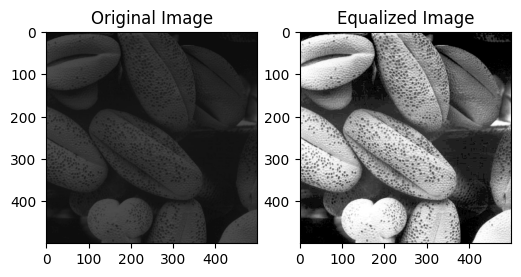

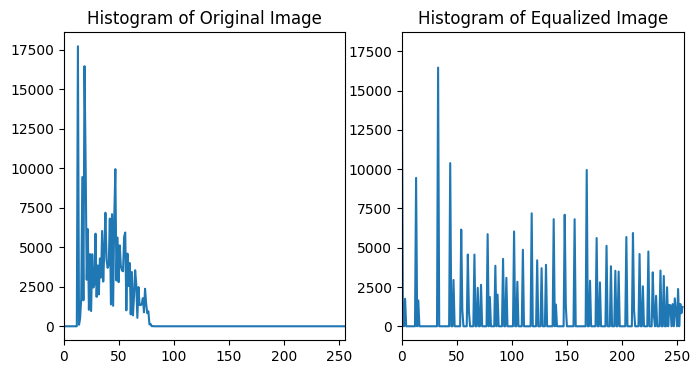

In [76]:
# Load the image (Figure 5)
img_hist_eq = cv2.imread('a1images/shells.tif', cv2.IMREAD_GRAYSCALE)


# Apply histogram equalization
equalized_img = cv2.equalizeHist(img_hist_eq)


Original_img = cv2.cvtColor(img_hist_eq, cv2.COLOR_BGR2RGB)

# Display original and equalized images
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)

plt.imshow(Original_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

plt.show()

# Function to plot histograms
def plot_gray_histogram(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(title)
    plt.xlim([0, 256])

# Plot histograms
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_gray_histogram(img_hist_eq, "Histogram of Original Image")


plt.subplot(1, 2, 2)
plot_gray_histogram(equalized_img, "Histogram of Equalized Image")

plt.show()


#### 6.1

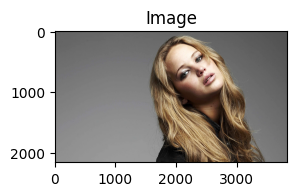

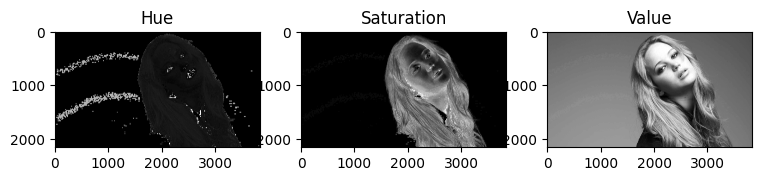

In [12]:
# Load the image
image = cv2.imread('a1images/jeniffer.jpg')  # Replace with actual image path

# Convert the image to HSV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split into hue, saturation, and value planes
h2, s2, v2 = cv2.split(image_rgb)


plt.figure(figsize=(3, 2))
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.show()

# Display each channel (Hue, Saturation, Value)
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(h2, cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s2, cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v2, cmap='gray')
plt.title('Value')

plt.show()

#### 6.2

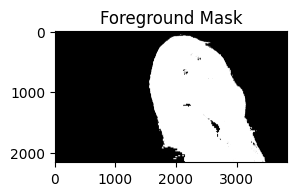

In [13]:
# Threshold the value plane to create a mask for the foreground
_, mask = cv2.threshold(s2, 13, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Display the binary mask using Matplotlib
plt.figure(figsize=(3, 2))
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.show()


#### 6.2 trash

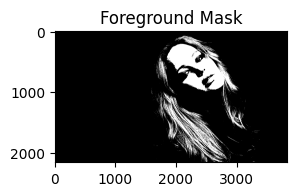

In [14]:
# Threshold the value plane to create a mask for the foreground
_, maskt = cv2.threshold(v2, 170, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Display the binary mask using Matplotlib
plt.figure(figsize=(3, 2))
plt.imshow(maskt, cmap='gray')
plt.title('Foreground Mask')
plt.show()

#### 6.3

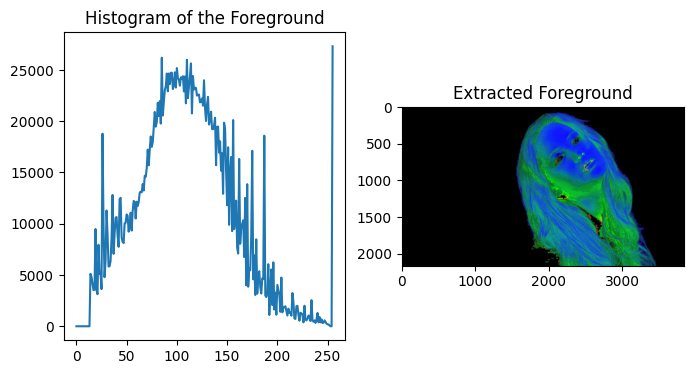

In [15]:
# Extract the foreground using the mask
foreground = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Compute histogram of the value plane of the foreground
hist = cv2.calcHist([s2], [0], mask, [256], [0, 256])

# Plot the histogram using Matplotlib
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist)
plt.title('Histogram of the Foreground')
# plt.show()

# Display the extracted foreground
#plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 2)
plt.imshow(foreground)
plt.title('Extracted Foreground')
plt.show()

#### 6.4

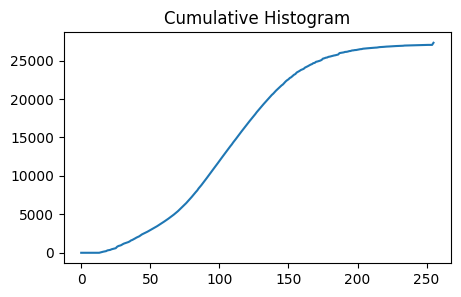

In [16]:
# Compute the cumulative sum of the histogram
cumsum_hist = np.cumsum(hist)

# Normalize the cumulative sum
cumsum_hist = cumsum_hist * hist.max() / cumsum_hist.max()

# Plot the cumulative histogram using Matplotlib
plt.figure(figsize=(5, 3))
plt.plot(cumsum_hist)
plt.title('Cumulative Histogram')
plt.show()


#### 6.5

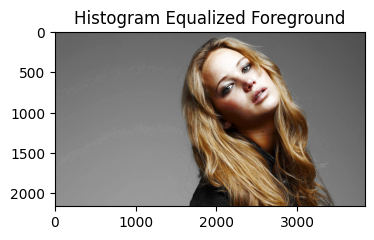

In [17]:
# Histogram equalization function
def histogram_equalization(s_plane, cumsum_hist):
    # Normalize the cumulative histogram
    cdf_min = cumsum_hist.min()
    cdf_normalized = ((cumsum_hist - cdf_min) * 255) / (cumsum_hist.max() - cdf_min)
    cdf_normalized = cdf_normalized.astype('uint8')
    
    # Apply the equalization
    equalized_s = cdf_normalized[s_plane]
    return equalized_s

# Apply histogram equalization to the value plane
equalized_s = histogram_equalization(s2, cumsum_hist)

# Merge the equalized V plane back with the H and S planes
equalized_hsv = cv2.merge([h2, equalized_s, v2])

# Convert back to RGB for display
equalized_image = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2RGB)

# Display the histogram-equalized foreground image using Matplotlib
plt.figure(figsize=(4, 3))
plt.imshow(equalized_image)
plt.title('Histogram Equalized Foreground')
plt.show()


#### 6.6

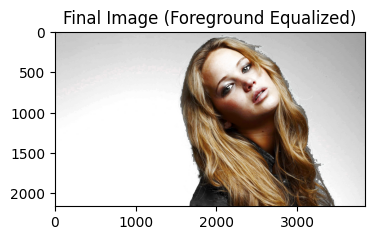

In [18]:
# Invert the mask to get the background
background_mask = cv2.bitwise_not(mask)

# Extract the background
background = cv2.bitwise_and(image, image, mask=background_mask)

# Combine the histogram-equalized foreground and background
combined_image = cv2.add(equalized_image, background)

# Display the final combined image using Matplotlib
plt.figure(figsize=(4, 3))
plt.imshow(combined_image)
plt.title('Final Image (Foreground Equalized)')
plt.show()


#### 7.1

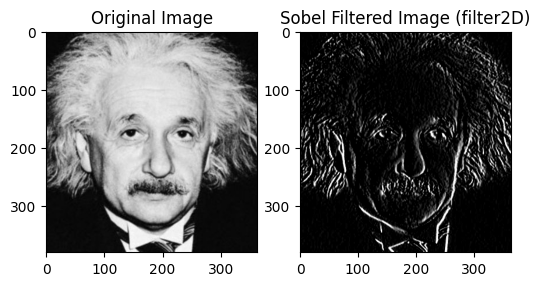

In [19]:
# Load the image (Figure 7)
img_sobel = cv2.imread('a1images/einstein.png', cv2.IMREAD_GRAYSCALE)

# Define the Sobel kernel for x-direction
sobel_kernel_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

# Apply filter2D with the Sobel kernel
sobel_filtered = cv2.filter2D(img_sobel, -1, sobel_kernel_x)

# Display the original and Sobel filtered images
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(img_sobel, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sobel_filtered, cmap='gray')
plt.title('Sobel Filtered Image (filter2D)')

plt.show()


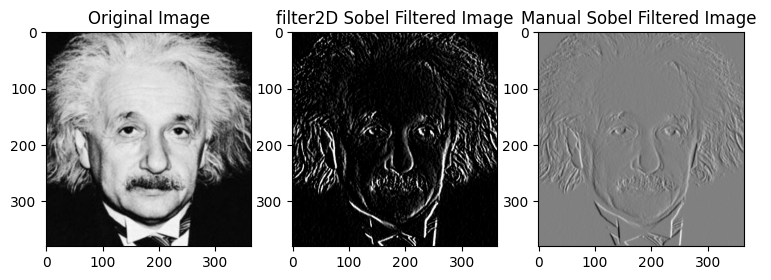

In [20]:
# Function for manual convolution
def apply_convolution(image, kernel):
    kernel_h, kernel_w = kernel.shape
    img_h, img_w = image.shape
    output = np.zeros((img_h, img_w))
    
    # Pad the image to handle edge cases
    padded_img = np.pad(image, ((1, 1), (1, 1)), 'constant')
    
    for i in range(1, img_h):
        for j in range(1, img_w):
            region = padded_img[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.sum(region * kernel)
    
    return output

# Apply manual Sobel filter in x-direction
sobel_manual_filtered = apply_convolution(img_sobel, sobel_kernel_x)

# Display the result
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(img_sobel, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sobel_filtered, cmap='gray')
plt.title('filter2D Sobel Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(sobel_manual_filtered, cmap='gray')
plt.title('Manual Sobel Filtered Image ')

plt.show()


#### 8

### Zooming Functions

#### Nearest-Neighbor Interpolation

In [21]:
def nearest_neighbor_zoom(image, scale_factor):
    # Use cv2 to perform nearest neighbor interpolation
    height, width = image.shape[:2]
    new_dimensions = (int(width * scale_factor), int(height * scale_factor))
    
    # Resizing with INTER_NEAREST for nearest-neighbor interpolation
    resized_image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_NEAREST)
    
    return resized_image


#### Bilinear Interpolation

In [22]:
def bilinear_zoom(image, scale_factor):
    # Use cv2 to perform bilinear interpolation
    height, width = image.shape[:2]
    new_dimensions = (int(width * scale_factor), int(height * scale_factor))
    
    # Resizing with INTER_LINEAR for bilinear interpolation
    resized_image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_LINEAR)
    
    return resized_image

### Computing Normalized Sum of Squared Differences (SSD)

In [23]:
def compute_normalized_ssd(original_image, scaled_image):
    # Ensure the images have the same dimensions
    if original_image.shape != scaled_image.shape:
        raise ValueError("Images must have the same dimensions to compute SSD")
    
    # Compute the SSD
    ssd = np.sum((original_image.astype("float") - scaled_image.astype("float")) ** 2)
    
    # Normalize by the number of pixels
    num_pixels = original_image.shape[0] * original_image.shape[1]
    normalized_ssd = ssd / num_pixels
    
    return normalized_ssd

#### Putting Everything Together

Normalized SSD for nearest-neighbor interpolation for image 1: 408.80714699074076
Normalized SSD for bilinear interpolation for image 1: 345.2757036072531
Normalized SSD for nearest-neighbor interpolation for image 2: 79.33826215277777
Normalized SSD for bilinear interpolation for image 2: 55.037753038194445
Normalized SSD for nearest-neighbor interpolation for image 3: 240.5664814497717
Normalized SSD for bilinear interpolation for image 3: 191.40904166666667
Normalized SSD for nearest-neighbor interpolation for image 4: 714.0844482142857
Normalized SSD for bilinear interpolation for image 4: 668.8184821428572
Normalized SSD for nearest-neighbor interpolation for image 5: 1457.67135
Normalized SSD for bilinear interpolation for image 5: 1351.3285285714285


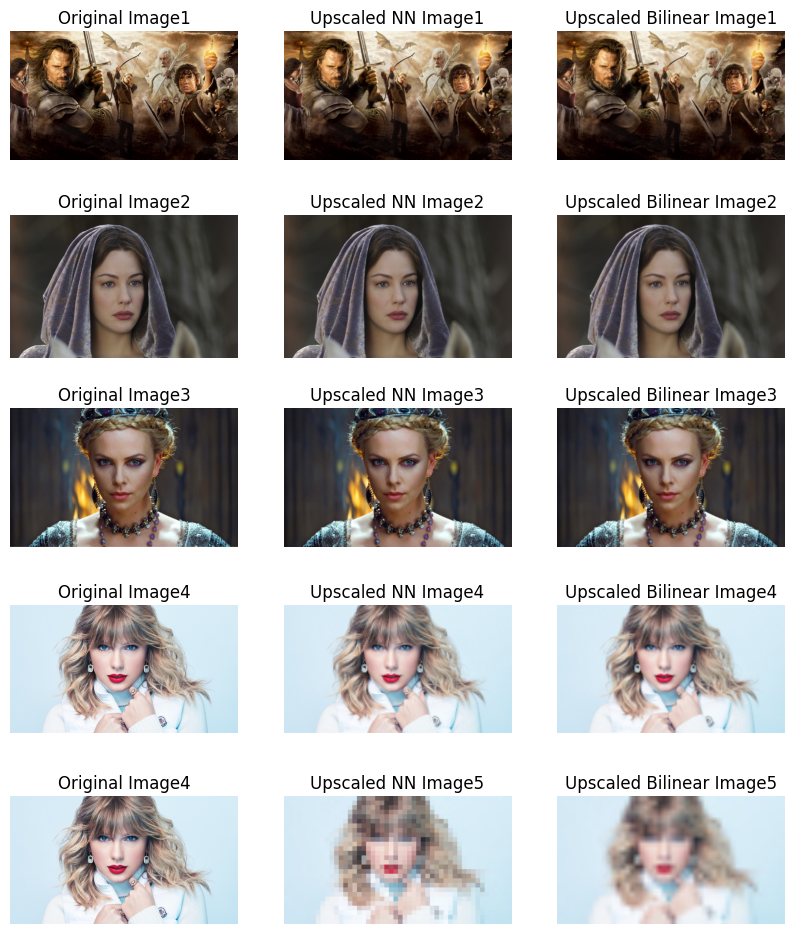

In [24]:
# Load the images
original_image1 = cv2.imread('a1images/a1q5images/im01.png')
original_image2 = cv2.imread('a1images/a1q5images/im02.png')
original_image3 = cv2.imread('a1images/a1q5images/im03.png')
original_image4 = cv2.imread('a1images/a1q5images/taylor.jpg')


small_image1 = cv2.imread('a1images/a1q5images/im01small.png')
small_image2 = cv2.imread('a1images/a1q5images/im02small.png')
small_image3 = cv2.imread('a1images/a1q5images/im03small.png')
small_image4 = cv2.imread('a1images/a1q5images/taylor_small.jpg')

very_small_image4 = cv2.imread('a1images/a1q5images/taylor_very_small.jpg')

# Resize the small image using nearest-neighbor
upscaled_nn_image1 = nearest_neighbor_zoom(small_image1, 4)
upscaled_nn_image2 = nearest_neighbor_zoom(small_image2, 4)
upscaled_nn_image3 = nearest_neighbor_zoom(small_image3, 4)
upscaled_nn_image4 = nearest_neighbor_zoom(small_image4, 5)

# Resize the very small image using nearest-neighbor
upscaled_nn_image5 = nearest_neighbor_zoom(very_small_image4, 20)

# Resize the small image using bilinear interpolation
upscaled_bilinear_image1 = bilinear_zoom(small_image1, 4)
upscaled_bilinear_image2 = bilinear_zoom(small_image2, 4)
upscaled_bilinear_image3 = bilinear_zoom(small_image3, 4)
upscaled_bilinear_image4 = bilinear_zoom(small_image4, 5)

# Resize the very small image using bilinear interpolation
upscaled_bilinear_image5 = bilinear_zoom(very_small_image4, 20)

# Compute normalized SSD between original and upscaled images
ssd_nn1 = compute_normalized_ssd(original_image1, upscaled_nn_image1)
ssd_bilinear1 = compute_normalized_ssd(original_image1, upscaled_bilinear_image1)

ssd_nn2 = compute_normalized_ssd(original_image2, upscaled_nn_image2)
ssd_bilinear2 = compute_normalized_ssd(original_image2, upscaled_bilinear_image2)

ssd_nn3 = compute_normalized_ssd(original_image3, upscaled_nn_image3)
ssd_bilinear3 = compute_normalized_ssd(original_image3, upscaled_bilinear_image3)

ssd_nn4 = compute_normalized_ssd(original_image4, upscaled_nn_image4)
ssd_bilinear4 = compute_normalized_ssd(original_image4, upscaled_bilinear_image4)

ssd_nn5 = compute_normalized_ssd(original_image4, upscaled_nn_image5)
ssd_bilinear5 = compute_normalized_ssd(original_image4, upscaled_bilinear_image5)

# Display the results
print(f"Normalized SSD for nearest-neighbor interpolation for image 1: {ssd_nn1}")
print(f"Normalized SSD for bilinear interpolation for image 1: {ssd_bilinear1}")

print(f"Normalized SSD for nearest-neighbor interpolation for image 2: {ssd_nn2}")
print(f"Normalized SSD for bilinear interpolation for image 2: {ssd_bilinear2}")

print(f"Normalized SSD for nearest-neighbor interpolation for image 3: {ssd_nn3}")
print(f"Normalized SSD for bilinear interpolation for image 3: {ssd_bilinear3}")

print(f"Normalized SSD for nearest-neighbor interpolation for image 4: {ssd_nn4}")
print(f"Normalized SSD for bilinear interpolation for image 4: {ssd_bilinear4}")

print(f"Normalized SSD for nearest-neighbor interpolation for image 5: {ssd_nn5}")
print(f"Normalized SSD for bilinear interpolation for image 5: {ssd_bilinear5}")

# Display images
plt.figure(figsize=(10, 12))

plt.subplot(5, 3, 1)
plt.title("Original Image1")
plt.imshow(cv2.cvtColor(original_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 2)
plt.title("Upscaled NN Image1")
plt.imshow(cv2.cvtColor(upscaled_nn_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 3)
plt.title("Upscaled Bilinear Image1")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 4)
plt.title("Original Image2")
plt.imshow(cv2.cvtColor(original_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 5)
plt.title("Upscaled NN Image2")
plt.imshow(cv2.cvtColor(upscaled_nn_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 6)
plt.title("Upscaled Bilinear Image2")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 7)
plt.title("Original Image3")
plt.imshow(cv2.cvtColor(original_image3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 8)
plt.title("Upscaled NN Image3")
plt.imshow(cv2.cvtColor(upscaled_nn_image3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 9)
plt.title("Upscaled Bilinear Image3")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 10)
plt.title("Original Image4")
plt.imshow(cv2.cvtColor(original_image4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 11)
plt.title("Upscaled NN Image4")
plt.imshow(cv2.cvtColor(upscaled_nn_image4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 12)
plt.title("Upscaled Bilinear Image4")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 13)
plt.title("Original Image4")
plt.imshow(cv2.cvtColor(original_image4, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 14)
plt.title("Upscaled NN Image5")
plt.imshow(cv2.cvtColor(upscaled_nn_image5, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(5, 3, 15)
plt.title("Upscaled Bilinear Image5")
plt.imshow(cv2.cvtColor(upscaled_bilinear_image5, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


#### 9

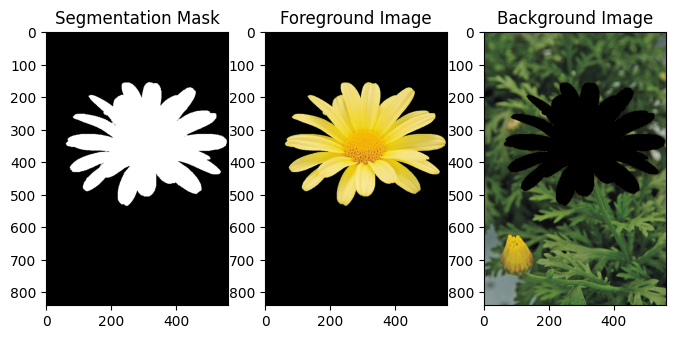

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the flower image
img_flower = cv2.imread('a1images/daisy.jpg')

# Initialize mask and grabCut parameters
mask = np.zeros(img_flower.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)
rect = (50, 100, 600, 500)  # Coordinates for the rectangle

# Apply grabCut algorithm
cv2.grabCut(img_flower, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Create binary mask for foreground
mask_foreground = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract the foreground
foreground_img = img_flower * mask_foreground[:, :, np.newaxis]

# Extract the background
background_img = img_flower * (1 - mask_foreground[:, :, np.newaxis])

# Plot the results
plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
plt.imshow(mask_foreground, cmap='gray')
plt.title('Segmentation Mask')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(foreground_img, cv2.COLOR_BGR2RGB))
plt.title('Foreground Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB))
plt.title('Background Image')

plt.show()


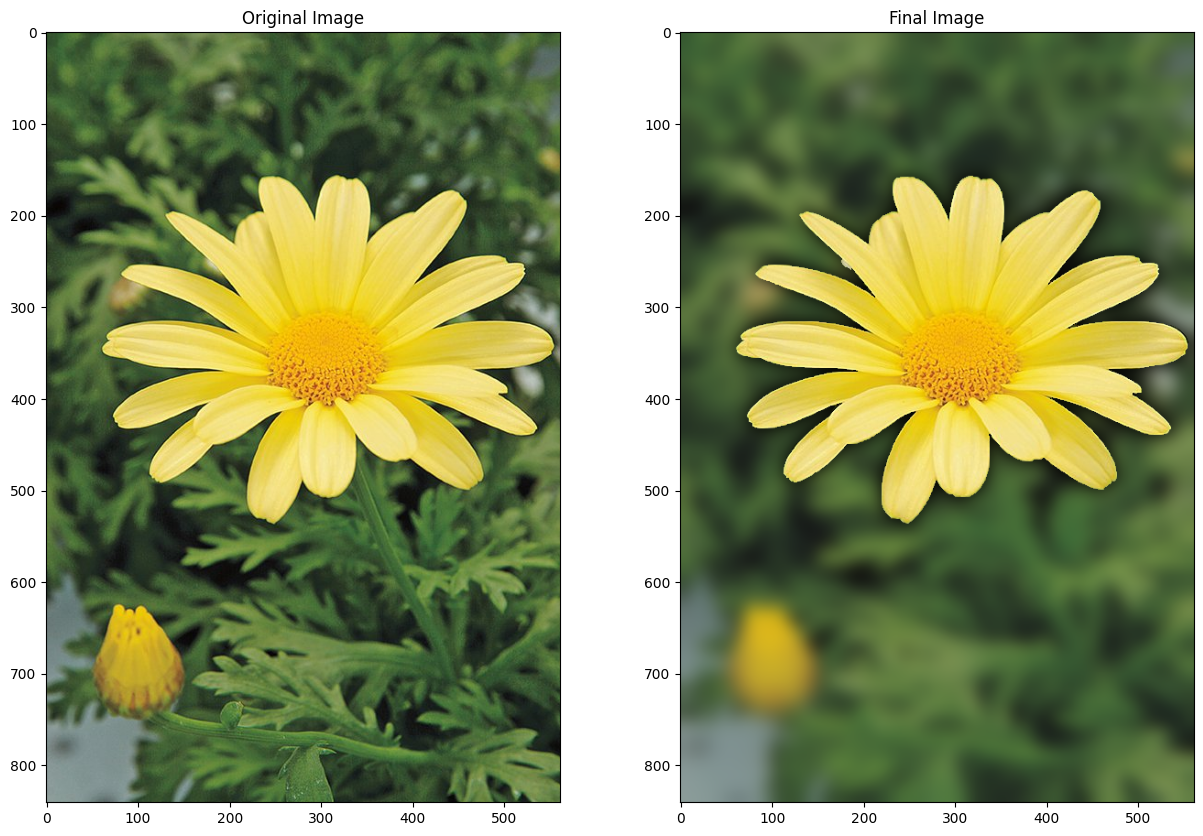

In [82]:
# Apply Gaussian blur to the background
blurred_background = cv2.GaussianBlur(background_img, (63, 63), 0)

# Combine blurred background and the foreground
final_img = blurred_background * (1 - mask_foreground[:, :, np.newaxis]) + foreground_img

# Plot the original and enhanced images
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.title('Final Image')

plt.show()


The background just beyond the edge of the flower appears darker in the enhanced image due to the properties of the grabCut segmentation algorithm. When the segmentation mask is applied, small regions near the edge of the object (flower) are often assigned to the background, causing them to blur together with the background. In these blurred regions, the original colors are mixed, resulting in a darker appearance at the boundary. Additionally, the Gaussian blur can further darken areas that are close to prominent edges like those around the flower petals.